In [1]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Simple PCA

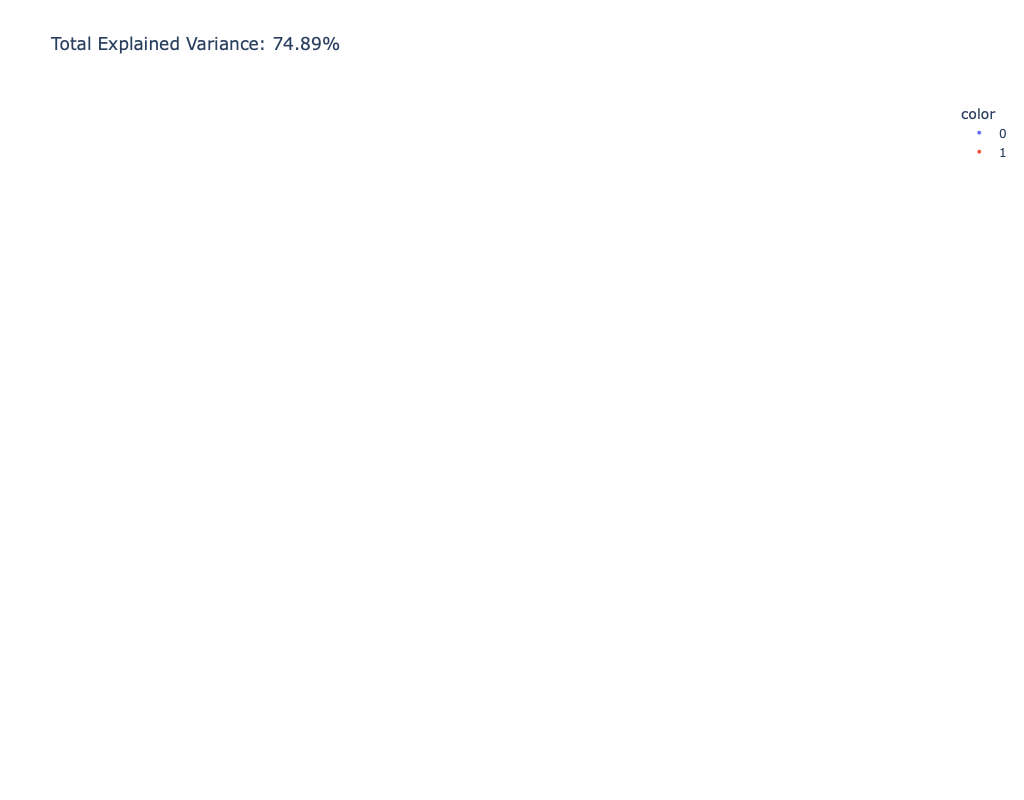

In [3]:
df = pd.read_csv('data/baby/genus_relative_abundance_otu_drop_baby.csv')
df.patientID = df.patientID.astype('category').cat.codes
metadata_list = ['sampleID', 'EverCovid', 'CovidStatus', 'CovidLabel', 'Timepoint', 'patientID','Age', 'HIVstatus']
# metadata_list = ['sampleID', 'EverCovid', 'CovidLabel', 'Timepoint', 'patientID']
# all the data
df_otu = df.drop(columns=metadata_list)
X = df_otu.to_numpy()
# y = df['CovidLabel'].astype(str)
# y = df['Age']
y = df['CovidStatus'].astype(str)
# y = df['HIVstatus'].astype(str)

pca = PCA(n_components=3)
# X = preprocessing.MaxAbsScaler().fit_transform(X)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=800)
fig.update_traces(marker_size=4)
fig.show()

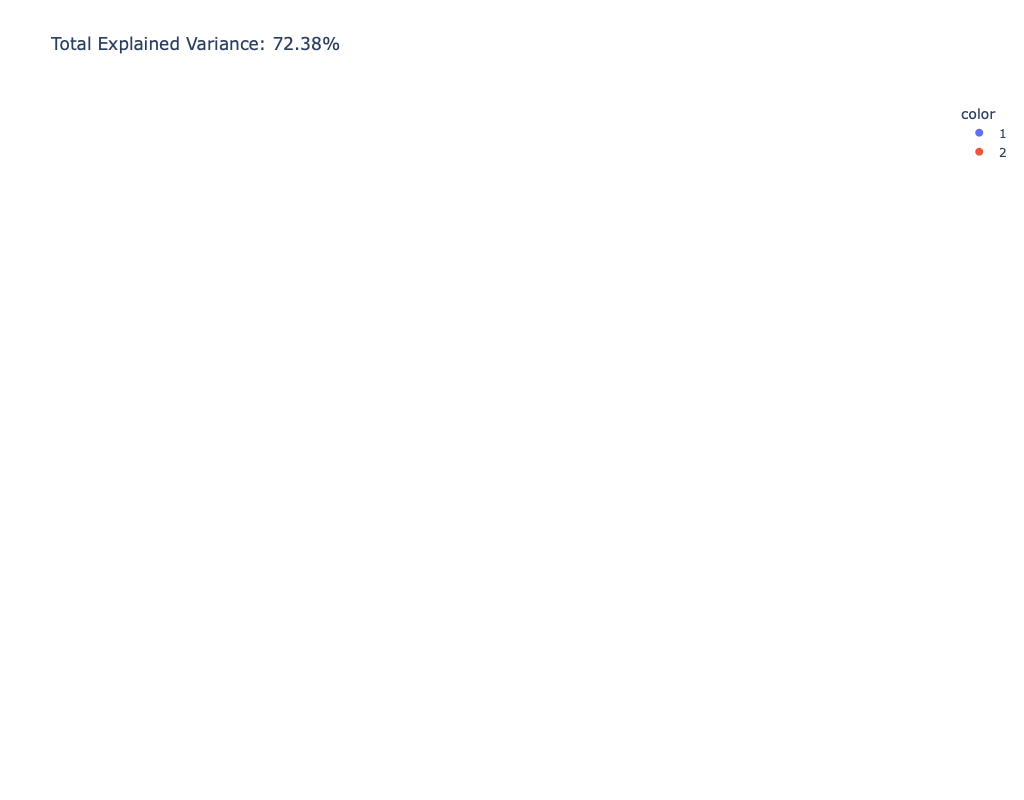

In [4]:
df = pd.read_csv('data/all/genus_relative_abundance_otu_drop.csv')
df.patientID = df.patientID.astype('category').cat.codes
#### mixed ideas about weather to include some metadata
metadata_list = ['sampleID', 'EverCovid', 'CovidStatus', 'CovidLabel', 'Timepoint', 'patientID','Age', 'HIVstatus']
# metadata_list = ['sampleID', 'EverCovid', 'CovidLabel', 'Timepoint', 'patientID']

# only CN and CP data pre-infection
df0 = df.loc[df['Timepoint'].isin([1, 2, 3])]  # all three time points T1,2,3
df1 = df0.loc[df0['CovidLabel'] == 1]  # case-negatives (CN) only exist in T1&2
df2 = df0.loc[df0['CovidLabel'] == 2]  # case-positives (CP) only exist in T3
df_CN_CP = pd.concat([df1, df2], ignore_index=True)  # reset the index after concat
df_CN_CP_otu = df_CN_CP.drop(columns=metadata_list)
X = df_CN_CP_otu.to_numpy()
y = df_CN_CP['CovidLabel'].astype(str)
# y = df_CN_CP['Age']
# y = df_CN_CP['HIVstatus'].astype(str)

pca = PCA(n_components=3)
### mixed ideas about weather to scale before PCA (definitly not normalization)
# X = preprocessing.MaxAbsScaler().fit_transform(X)  
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=800
)
fig.show()

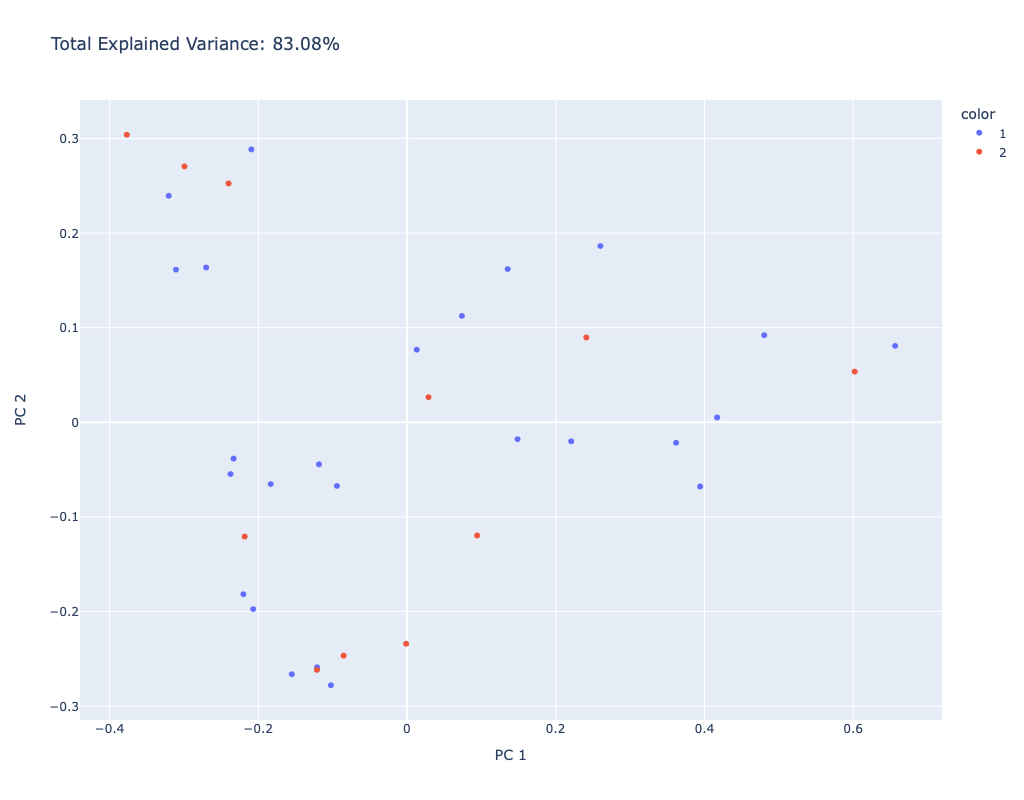

In [5]:
df = pd.read_csv('data/mom/genus_relative_abundance_otu_drop_mom.csv')
df.patientID = df.patientID.astype('category').cat.codes
metadata_list = ['sampleID', 'EverCovid', 'CovidStatus', 'CovidLabel', 'Timepoint', 'patientID','Age', 'HIVstatus']
# metadata_list = ['sampleID', 'EverCovid', 'CovidLabel', 'Timepoint', 'patientID']
# metadata_list = ['sampleID', 'EverCovid', 'CovidStatus', 'CovidLabel', 'Timepoint', 'patientID']

# only CN and CP data pre-infection
df0 = df.loc[df['Timepoint'].isin([1, 2, 3])]  # all three time points T1,2,3
df1 = df0.loc[df0['CovidLabel'] == 1]  # case-negatives (CN) only exist in T1&2
df2 = df0.loc[df0['CovidLabel'] == 2]  # case-positives (CP) only exist in T3
df_CN_CP = pd.concat([df1, df2], ignore_index=True)  # reset the index after concat
df_CN_CP_otu = df_CN_CP.drop(columns=metadata_list)
X = df_CN_CP_otu.to_numpy()
y = df_CN_CP['CovidLabel'].astype(str)
# y = df_CN_CP['Age']
# y = df_CN_CP['HIVstatus'].astype(str)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(
    components, x=0, y=1, color=y,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=800)
fig.show()

## T-SNE

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 215 samples in 0.001s...
[t-SNE] Computed neighbors for 215 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 215 / 215
[t-SNE] Mean sigma: 1.101979
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.392628
[t-SNE] KL divergence after 1000 iterations: 0.053327


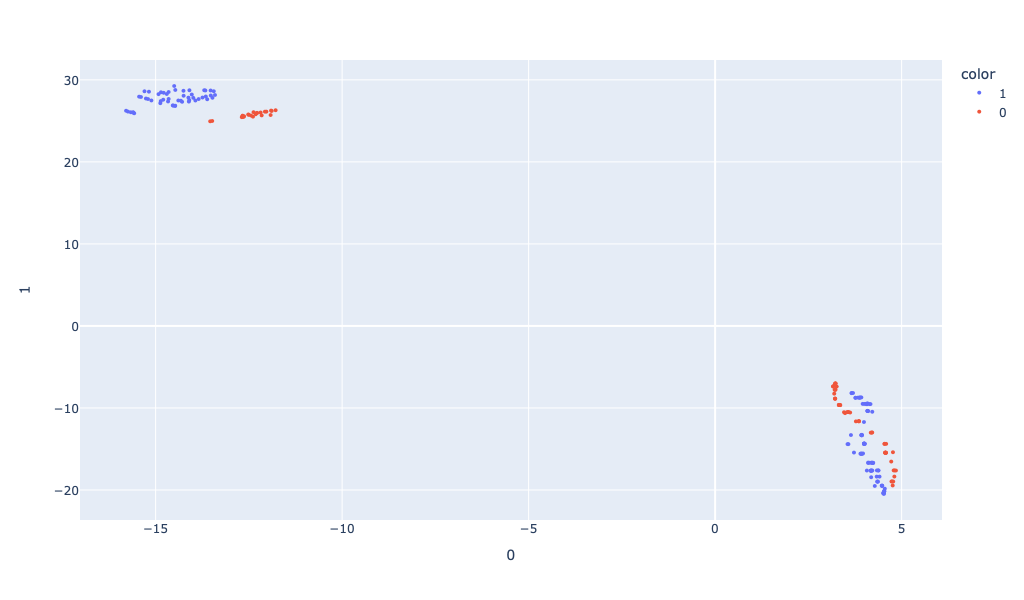

In [116]:
df = pd.read_csv('data/genus_relative_abundance_otu_drop.csv')
df.patientID = df.patientID.astype('category').cat.codes
# metadata_list = ['sampleID', 'EverCovid', 'CovidStatus', 'CovidLabel', 'Timepoint', 'patientID','Age', 'HIVstatus']
metadata_list = ['sampleID', 'EverCovid', 'CovidLabel', 'Timepoint', 'patientID']

# all the data
df_otu = df.drop(columns=metadata_list)
X = df_otu.to_numpy()

# first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X) 

# reduce dimensionality with t-sne
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=300)
projections = tsne.fit_transform(X_pca)

# visualize
# y = df['CovidStatus'].astype(str) # showed some groups
# y = df['Age']
y = df['HIVstatus'].astype(str) # showed some groups
# y = df['CovidLabel'].astype(str) # showed some groups
fig = px.scatter(projections, x=0, y=1, color=y, width=600, height=600)
fig.update_traces(marker_size=4)
fig.show()

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 6.382699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.750526
[t-SNE] KL divergence after 1000 iterations: 0.331992


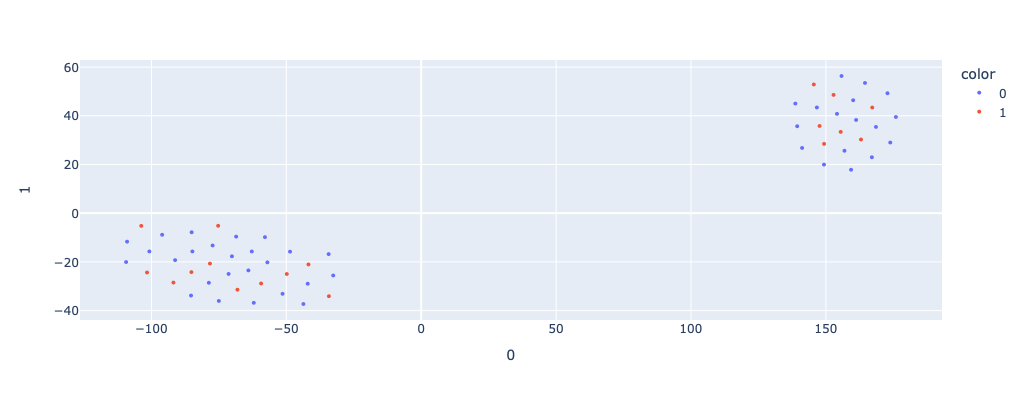

In [19]:
df = pd.read_csv('data/all/genus_relative_abundance_otu_drop.csv')
df.patientID = df.patientID.astype('category').cat.codes
# metadata_list = ['sampleID', 'EverCovid', 'CovidStatus', 'CovidLabel', 'Timepoint', 'patientID','Age', 'HIVstatus']
metadata_list = ['sampleID', 'EverCovid', 'CovidLabel', 'Timepoint', 'patientID']

# only CN and CP data pre-infection
df0 = df.loc[df['Timepoint'].isin([1, 2, 3])]  # all three time points T1,2,3
df1 = df0.loc[df0['CovidLabel'] == 1]  # case-negatives (CN) only exist in T1&2
df2 = df0.loc[df0['CovidLabel'] == 2]  # case-positives (CP) only exist in T3
df_CN_CP = pd.concat([df1, df2], ignore_index=True)  # reset the index after concat
df_CN_CP_otu = df_CN_CP.drop(columns=metadata_list)
X = df_CN_CP_otu.to_numpy()

# first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
# X = preprocessing.MaxAbsScaler().fit_transform(X)
X_pca = pca.fit_transform(X) 

# reduce dimensionality with t-sne
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=200)
projections = tsne.fit_transform(X_pca)

# visualize
y = df_CN_CP['CovidStatus'].astype(str)
# y = df_CN_CP['Age']
# y = df_CN_CP['HIVstatus'].astype(str)
# y = df_CN_CP['CovidLabel'].astype(str) # show some groups for mother samples
fig = px.scatter(projections, x=0, y=1, color=y, width=400, height=400)
fig.update_traces(marker_size=4)
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 215 samples in 0.009s...
[t-SNE] Computed neighbors for 215 samples in 0.202s...
[t-SNE] Computed conditional probabilities for sample 215 / 215
[t-SNE] Mean sigma: 0.755206
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.258858
[t-SNE] KL divergence after 1000 iterations: 1.441246


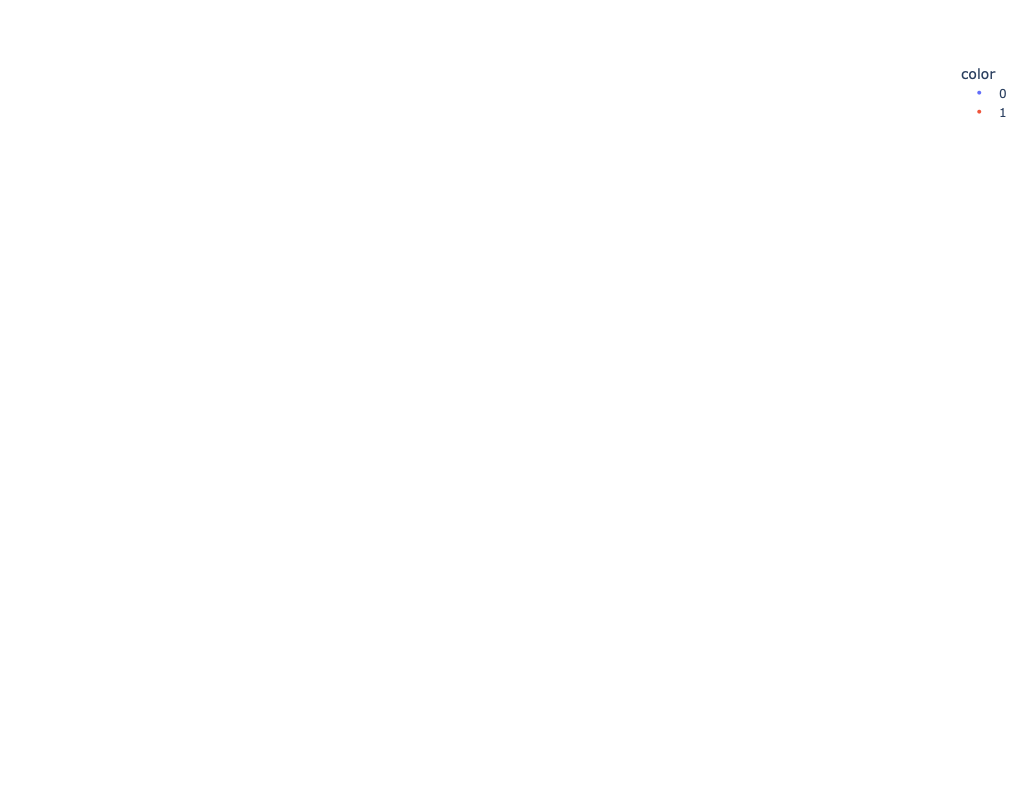

In [6]:
df = pd.read_csv('data/all/genus_relative_abundance_otu_drop.csv')
df.patientID = df.patientID.astype('category').cat.codes
# metadata_list = ['sampleID', 'EverCovid', 'CovidStatus', 'CovidLabel', 'Timepoint', 'patientID','Age', 'HIVstatus']
metadata_list = ['sampleID', 'EverCovid', 'CovidLabel', 'Timepoint', 'patientID']

# all the data
df_otu = df.drop(columns=metadata_list)
X = df_otu.to_numpy()

# first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X) 

# reduce dimensionality with t-sne
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
projections = tsne.fit_transform(X_pca)

# visualize
y = df['CovidStatus'].astype(str)
# y = df_CN_CP['Age']
# y = df_CN_CP['HIVstatus'].astype(str)
# y = df_CN_CP['CovidLabel'].astype(str)
fig = px.scatter_3d(projections, x=0, y=1, z=2, color=y, width=800, height=800)
fig.update_traces(marker_size=4)
fig.show()